In [2]:
#the following 2 lines are required if sgoop is not installed
import sys
sys.path.append("..") 

import sgoop.sgoop as sgoop
import sgoop.reweight as DP
import scipy.optimize as opt
import numpy as np
import time
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [3]:
def opti_func(rc):
    global nfev
    nfev +=1
    p = DP.reweight(rc,sparse=False)
    sgoop.set_bins(rc,np.shape(p)[0],DP.s_min,DP.s_max) # Setting bins for maxcal
    return -sgoop.sgoop(rc,p)

In [4]:
def print_fun(x, f, accepted):
    global now,last,nfev,lastf
    now=time.time()
    print(x,end=' ')
    if accepted == 1:
        print("with spectral gap %.4f accepted after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    else:
        print("with spectral gap %.4f declined after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    last=now
    lastf=nfev

In [5]:
def prob_compare(rc):
    p2 = DP.reweight(rc)
    sgoop.rei()
    sgoop.set_bins(rc,DP.ngrid,DP.s_min,DP.s_max)
    p=np.zeros(sgoop.rc_bin)
    for i in sgoop.binned:
        p[i]+=1
    plt.plot(p/np.sum(p))
    plt.title('MaxCal')
    plt.figure()
    plt.plot(p2)
    plt.title('Reweighted')

In [6]:
def clean_compare(rc):
    p2 = DP.reweight(rc)
    sgoop.rei()
    sgoop.set_bins(rc,DP.ngrid,DP.s_min,DP.s_max)
    p2 = sgoop.clean_whitespace(p2)
    p=np.zeros(sgoop.rc_bin)
    for i in sgoop.binned:
        p[i]+=1
    plt.plot(p/np.sum(p))
    plt.title('MaxCal')
    plt.figure()
    plt.plot(p2)
    plt.title('Reweighted')

In [7]:
sgoop.wells = 2
start = time.time()
last = start
lastf = nfev = 0
minimizer_kwargs = {"options": {"maxiter":10}}
x0=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#x0=[1.036,-.976,3.361,-1.375,3.786,3.572,4.981,-.006,-.955,-.329,-1.900]
ret = opt.basinhopping(opti_func, x0, niter=10, T=.01,
                       stepsize=1, minimizer_kwargs=minimizer_kwargs, 
                       callback=print_fun)
end = time.time()
print(end-start)
ret

../sgoop/reweight.py:161: RuntimeWarning: invalid value encountered in double_scalars
  locs[j] = int((val - s_min) / ds)  # find position of minimum in diff array


ValueError: cannot convert float NaN to integer

In [8]:
p = DP.reweight(ret.x,sparse=False)

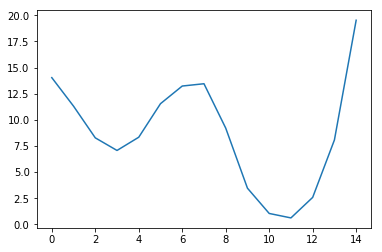

In [9]:
plt.plot(-np.ma.log(p))

In [10]:
-np.log(p)

array([ 14.038,  11.309,  8.279,  7.072,  8.338,  11.546,  13.235,
        13.455,  9.210,  3.462,  1.045,  0.618,  2.581,  8.074,  19.529])

0.6642607868968493
0.4447130895719251


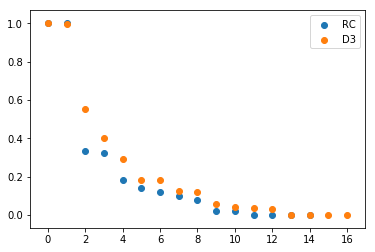

In [11]:
print(-opti_func(ret.x))
shape=np.shape(sgoop.SEE[-1])[0]
plt.scatter(np.linspace(0,shape-1,shape),sgoop.SEE[-1])
print(-opti_func([0,0,1,0,0,0,0,0,0,0,0]))
shape=np.shape(sgoop.SEE[-1])[0]
plt.scatter(np.linspace(0,shape-1,shape),sgoop.SEE[-1])
plt.legend(['RC','D3'])

0.6642607868968493
0.4590906715380645


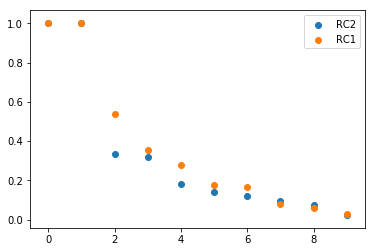

In [12]:
print(-opti_func(ret.x))
shape=10
plt.scatter(np.linspace(0,shape-1,shape),sgoop.SEE[-1][:shape])
print(-opti_func([1.036,-.976,3.361,-1.375,3.786,3.572,4.981,-.006,-.955,-.329,-1.900]))
plt.scatter(np.linspace(0,shape-1,shape),sgoop.SEE[-1][:shape])
plt.legend(['RC2','RC1'])

In [13]:
print(ret.x)

[-0.817 -4.018  2.201  1.344  3.202  2.655  0.368 -2.630  4.543  0.528
  0.547]
